In [758]:
import matplotlib.pyplot as plt
import numpy as np

In [759]:
step = 1e-3
times = int(25 / step)

r_or = [np.array([-5, 0]), np.array([-10, 0]), np.array([-15, 0])]
vL_list = [np.array([6, 0])]
v_list = [[np.array([9, 3]), np.array([8, 4]), np.array([10, 5])]]
x_list = [[np.array([16, 70]), np.array([10, 40]), np.array([6, 60])]]
xL_list = [np.array([20, 50])]

a = np.ones((3, 3))
# 选择性断开连接
# a[2][1]=0
# a[1][2]=0
# a[0][2]=0
# a[2][0]=0
# print(a)

k = np.array([1, 1, 0]) * 5
for t in range(0, times):
    v_temp = []
    x_temp = []
    for i in range(0, 3):
        v_temp_num = -1 * k[i] * (x_list[t][i] - xL_list[t] - r_or[i] + v_list[t][i] - vL)
        for j in range(0, 3):
            v_temp_num = v_temp_num - a[i][j] * (
                    x_list[t][i] - x_list[t][j] - r_or[i] + r_or[j] + v_list[t][i] - v_list[t][j])
        v_temp.append(v_list[t][i] + v_temp_num * step)
        x_temp.append(x_list[t][i] + v_list[-1][i] * step)
    v_list.append(v_temp)
    x_list.append(x_temp)
    xL_list.append(xL_list[-1] + vL * step)
    vL_list.append(vL)

In [760]:
v1_list = []
v2_list = []
v3_list = []

for i in range(times):
    v1_list.append(v_list[i][0])
for i in range(times):
    v2_list.append(v_list[i][1])
for i in range(times):
    v3_list.append(v_list[i][2])

In [761]:
x1_list = []
x2_list = []
x3_list = []

for i in range(times):
    x1_list.append(x_list[i][0])
for i in range(times):
    x2_list.append(x_list[i][1])
for i in range(times):
    x3_list.append(x_list[i][2])

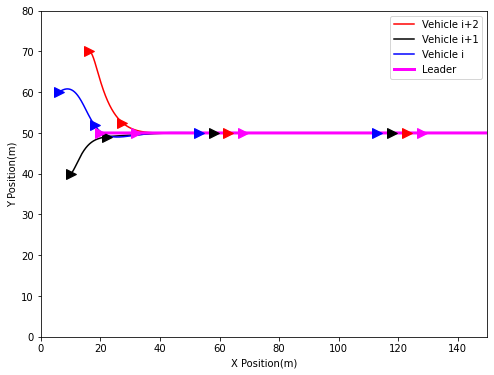

In [762]:
plt.figure(figsize=(8,6))
plt.plot([i[0] for i in x1_list], [j[1] for j in x1_list], c="red")
plt.plot([i[0] for i in x2_list], [j[1] for j in x2_list], c="black")
plt.plot([i[0] for i in x3_list], [j[1] for j in x3_list], c="blue")
plt.plot([i[0] for i in xL_list], [j[1] for j in xL_list], c="magenta", linewidth=3.0)

plt.plot(x1_list[0][0], x1_list[0][1], '>', c="red", markersize=10)
plt.plot(x1_list[2000][0], x1_list[2000][1], '>', c="red", markersize=10)
plt.plot(x1_list[8000][0], x1_list[8000][1], '>', c="red", markersize=10)
plt.plot(x1_list[18000][0], x1_list[18000][1], '>', c="red", markersize=10)

plt.plot(x2_list[0][0], x2_list[0][1], '>', c="black", markersize=10)
plt.plot(x2_list[2000][0], x2_list[2000][1], '>', c="black", markersize=10)
plt.plot(x2_list[8000][0], x2_list[8000][1], '>', c="black", markersize=10)
plt.plot(x2_list[18000][0], x2_list[18000][1], '>', c="black", markersize=10)

plt.plot(x3_list[0][0], x3_list[0][1], '>', c="blue", markersize=10)
plt.plot(x3_list[2000][0], x3_list[2000][1], '>', c="blue", markersize=10)
plt.plot(x3_list[8000][0], x3_list[8000][1], '>', c="blue", markersize=10)
plt.plot(x3_list[18000][0], x3_list[18000][1], '>', c="blue", markersize=10)

plt.plot(xL_list[0][0], xL_list[0][1], '>', c="magenta", markersize=10)
plt.plot(xL_list[2000][0], xL_list[2000][1], '>', c="magenta", markersize=10)
plt.plot(xL_list[8000][0], xL_list[8000][1], '>', c="magenta", markersize=10)
plt.plot(xL_list[18000][0], xL_list[18000][1], '>', c="magenta", markersize=10)

plt.xlabel("X Position(m)")
plt.ylabel("Y Position(m)")
plt.xlim([0, 150])
plt.ylim([0, 80])
plt.legend(["Vehicle i+2", "Vehicle i+1", "Vehicle i", "Leader"] )
plt.show()

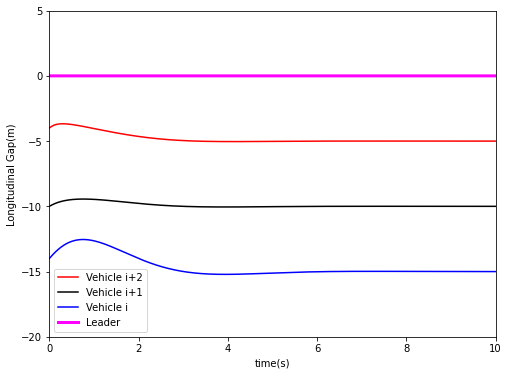

In [763]:
plt.figure(figsize=(8,6))
x1_gap_list = []
x2_gap_list = []
x3_gap_list = []
for i in range(times):
    x1_gap_list.append(x1_list[i] - xL_list[i])
for i in range(times):
    x2_gap_list.append(x2_list[i] - xL_list[i])
for i in range(times):
    x3_gap_list.append(x3_list[i] - xL_list[i])

plt.plot([i * step for i in range(times)], [i[0] for i in x1_gap_list], c="red")
plt.plot([i * step for i in range(times)], [i[0] for i in x2_gap_list], c="black")
plt.plot([i * step for i in range(times)], [i[0] for i in x3_gap_list], c="blue")
plt.plot([i * step for i in range(times)], [0 for i in xL_list[:times]], c="magenta", linewidth=3.0)
plt.xlabel("time(s)")
plt.ylabel("Longitudinal Gap(m)")
plt.ylim([-20, 5])
plt.xlim([0, 10])
plt.legend(["Vehicle i+2", "Vehicle i+1", "Vehicle i", "Leader"])
plt.show()

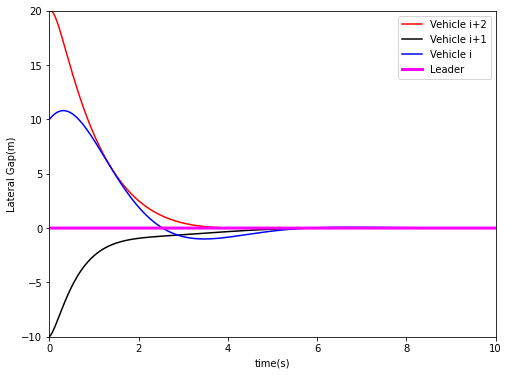

In [764]:
plt.figure(figsize=(8,6))
plt.plot([i * step for i in range(times)], [i[1] for i in x1_gap_list], c="red")
plt.plot([i * step for i in range(times)], [i[1] for i in x2_gap_list], c="black")
plt.plot([i * step for i in range(times)], [i[1] for i in x3_gap_list], c="blue")
plt.plot([i * step for i in range(times)], [0 for i in xL_list[:times]], c="magenta", linewidth=3.0)
plt.xlabel("time(s)")
plt.ylabel("Lateral Gap(m)")
plt.ylim([-10, 20])
plt.xlim([0, 10])
plt.legend(["Vehicle i+2", "Vehicle i+1", "Vehicle i", "Leader"])
plt.show()

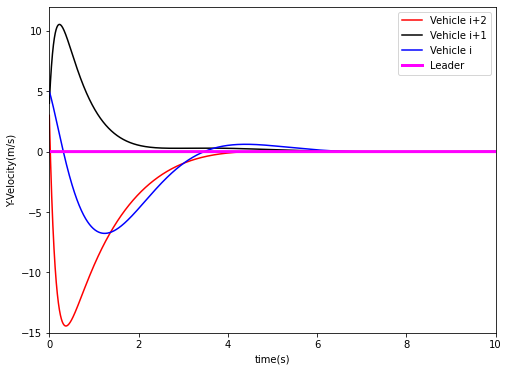

In [765]:
plt.figure(figsize=(8,6))
plt.plot([i * step for i in range(times)], [i[1] for i in v1_list], c="red")
plt.plot([i * step for i in range(times)], [i[1] for i in v2_list], c="black")
plt.plot([i * step for i in range(times)], [i[1] for i in v3_list], c="blue")
plt.plot([i * step for i in range(times)], [i[1] for i in vL_list[:times]], c="magenta", linewidth=3.0)
plt.xlabel("time(s)")
plt.ylabel("Y-Velocity(m/s)")
plt.ylim([-15, 12])
plt.xlim([0, 10])
plt.legend(["Vehicle i+2", "Vehicle i+1", "Vehicle i", "Leader"])
plt.show()

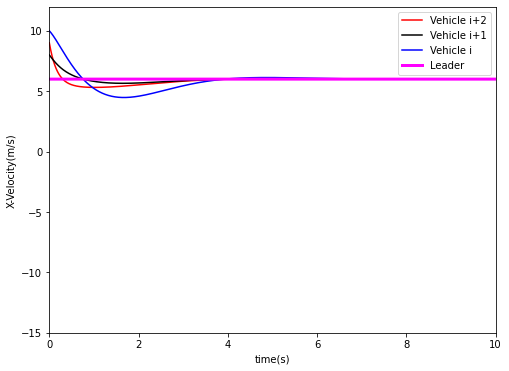

In [766]:
plt.figure(figsize=(8,6))
plt.plot([i * step for i in range(times)], [i[0] for i in v1_list], c="red")
plt.plot([i * step for i in range(times)], [i[0] for i in v2_list], c="black")
plt.plot([i * step for i in range(times)], [i[0] for i in v3_list], c="blue")
plt.plot([i * step for i in range(times)], [i[0] for i in vL_list[:times]], c="magenta", linewidth=3.0)
plt.xlabel("time(s)")
plt.ylabel("X-Velocity(m/s)")
plt.ylim([-15, 12])
plt.xlim([0, 10])
plt.legend(["Vehicle i+2", "Vehicle i+1", "Vehicle i", "Leader"])
plt.show()